In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import copy

The regularized linear regression is realized to predict the change of water level in the reservoir, so as to predict the outflow of water from the dam

# Visualizing

In [2]:
data = loadmat('ex5/ex5data1.mat')
data['X'][:5]

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945]])

In [3]:
X_train = data['X']
y_train = data['y']

X_train.shape, y_train.shape

((12, 1), (12, 1))

In [4]:
X_val = data['Xval']
y_val = data['yval']

X_val.shape, y_val.shape

((21, 1), (21, 1))

In [5]:
X_test = data['Xtest']
y_test = data['ytest']

X_test.shape, y_test.shape

((21, 1), (21, 1))

In [6]:
X_train = np.insert(X_train, 0, 1, axis=1)

X_val = np.insert(X_val, 0, 1, axis=1)

X_test = np.insert(X_test, 0, 1, axis=1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((12, 2), (12, 1), (21, 2), (21, 1), (21, 2), (21, 1))

In [7]:
theta = np.zeros(X_train.shape[1]).reshape(X_train.shape[1], 1)
theta.shape

(2, 1)

Text(0, 0.5, 'Water flowing out of the dam (y)')

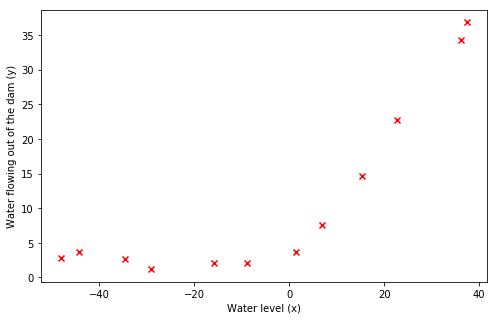

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,1:], y_train, c='r', marker='x')
plt.xlabel('Water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

# Cost function

In [9]:
def cost(X, y, theta):
    return np.sum(np.power((np.dot(X, theta) - y), 2)) / (2*len(X))

def reg_cost(X, y, theta, l=0):
    return cost(X, y, theta) + np.sum(((l/(2*len(X))) * np.power(theta[1:], 2).squeeze()))

In [10]:
reg_cost(X_train, y_train, theta, 1)

140.95412088055392

# Gradient

In [11]:
def gradient(X, y, theta):
    return np.dot((np.dot(X, theta) - y).T, X) / len(X)

def reg_gradient(X, y, theta, l=0):
    l_theta = copy.deepcopy(theta).T.squeeze()
    l_theta[0] = 0
    return gradient(X, y, theta) + ((l / len(X)) * l_theta)

In [12]:
reg_gradient(X_train, y_train, theta, 1).squeeze()

array([ -11.21758933, -245.65199649])

# Gradient descent

In [13]:
def GD(X, y, theta, l, lr, epoch):
    temp = theta
    _cost = []
    
    for i in range(epoch):
        temp = theta.T.squeeze() - (lr * reg_gradient(X, y, theta, l).squeeze()) 
        theta = temp.reshape(-1, 1)
        
        c = reg_cost(X, y, theta, l)
        _cost.append(c)
        
        if i % (epoch / 10) == 0:
            print('epoch: ', i+1, 'cost:', c)
            
    return  theta, _cost

# Train

In [14]:
lr = 0.002
epoch = 2000
l = 0

In [15]:
f_theta, his_cost = GD(X_train, y_train, theta, l, lr, epoch)

epoch:  1 cost: 122.4110034273307
epoch:  201 cost: 60.43990054245908
epoch:  401 cost: 39.88733588367892
epoch:  601 cost: 30.431497440110917
epoch:  801 cost: 26.081048619960267
epoch:  1001 cost: 24.079491058491584
epoch:  1201 cost: 23.15861304394832
epoch:  1401 cost: 22.734934837538443
epoch:  1601 cost: 22.540008669520727
epoch:  1801 cost: 22.450326900661196


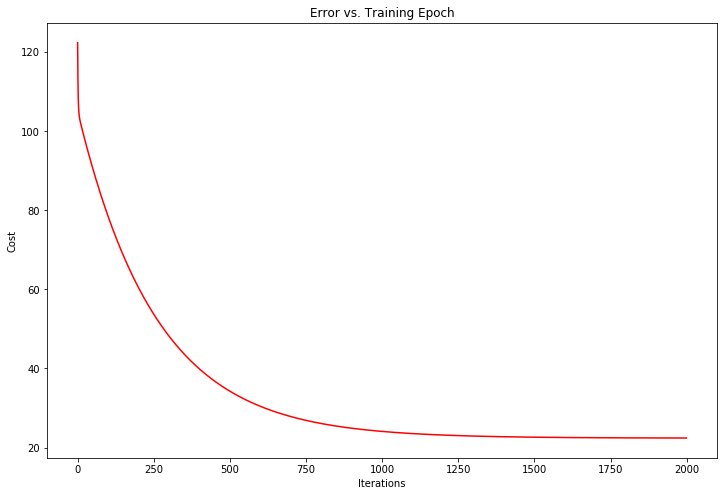

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch), his_cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

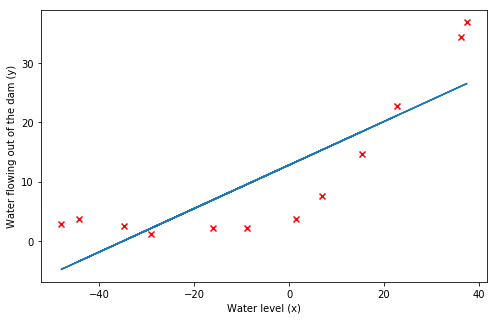

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,1:], y_train, c='r', marker='x')
plt.xlabel('Water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X_train[:,1], np.dot(X_train, f_theta))

# Learning curves

Manual adjustment of gradient descent is too cumbersome, so we use sklearn here

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def loss(y, y_pred):
    return mean_squared_error(y, y_pred) / 2

In [19]:
def learn_curves(X_train, y_train, X_val, y_val):
    train_curves = []
    val_curves = []
    for i in range(1, len(X_train)+1):
        model = linear_model.LinearRegression()
        model.fit(X_train[:i], y_train[:i])

        y_pred = model.predict(X_train[:i])
        train_loss = loss(y_train[:i], y_pred)

        train_curves.append(train_loss)

        y_pred = model.predict(X_val)
        val_loss = loss(y_val, y_pred)

        val_curves.append(val_loss)
        del model

    plt.figure(figsize=(8,5))
    plt.plot(range(1, len(X_train)+1), train_curves, label='train cost')  
    plt.plot(range(1, len(X_train)+1), val_curves, label='val cost') 
    plt.legend()
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.title('Learning curve for linear regression')

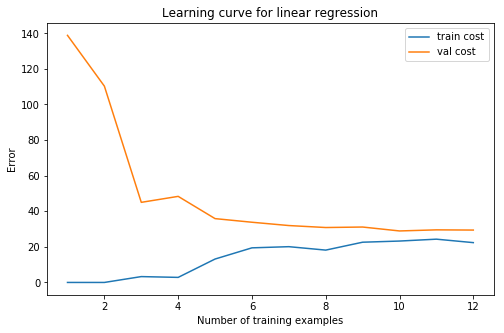

In [20]:
learn_curves(X_train, y_train, X_val, y_val)

# Learning polynomial regression

In [21]:
def poly(X, power):
    Xp = X.copy()
    for i in range(2, power+1):
        Xp = np.insert(Xp, Xp.shape[1], np.power(Xp[:, 1], i), axis=1)
    return Xp

def norm(X, means, stds):
    X_norm = X.copy()
    X_norm[:, 1:] = X_norm[:, 1:] - means[1:]
    X_norm[:, 1:] = X_norm[:, 1:] / stds[1:]
    return X_norm

In [22]:
power = 6

Xp_train = poly(X_train, power)
Xp_val = poly(X_val, power)
Xp_test = poly(X_test, power)

means = np.mean(Xp_train, axis=0)
stds = np.std(Xp_train, axis=0, ddof=1)

Xp_train_norm = norm(Xp_train, means, stds)
Xp_val_norm = norm(Xp_val, means, stds)
Xp_test_norm = norm(Xp_test, means, stds)

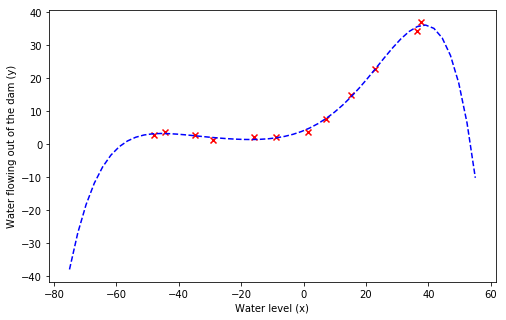

In [23]:
model = linear_model.LinearRegression()
model.fit(Xp_train_norm, y_train)

f_theta0 = model.intercept_
f_theta = model.coef_
del model

xx = np.linspace(-75,55,50)
x = xx.reshape(-1, 1)
x = np.insert(x, 0, 1, axis=1)
xp = poly(x, power)
xp_norm = norm(xp, means, stds)

plt.figure(figsize=(8,5))
plt.scatter(X_train[:,1:], y_train, c='r', marker='x')
plt.xlabel('Water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(xx, np.dot(xp_norm, f_theta.T)+f_theta0, 'b--')

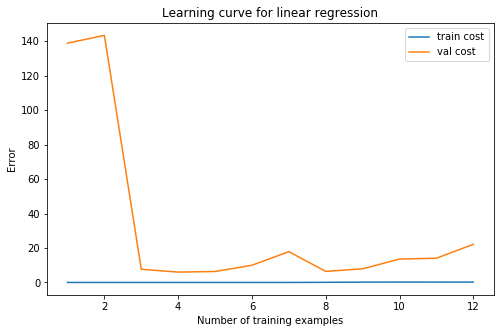

In [24]:
learn_curves(Xp_train_norm, y_train, Xp_val_norm, y_val)

Well, overfit

# Adjusting the regularization parameter

In [25]:
lr = 0.002
epoch = 2000
l = 1
theta = np.ones(Xp_train_norm.shape[1]).reshape(-1, 1)

In [26]:
Xp_train_norm.shape

(12, 7)

In [27]:
f_theta, his_cost = GD(Xp_train_norm, y_train, theta, l, lr, epoch)

epoch:  1 cost: 106.95885145853494
epoch:  201 cost: 47.23912370781533
epoch:  401 cost: 25.203679221554413
epoch:  601 cost: 15.545750031988385
epoch:  801 cost: 11.246580892099617
epoch:  1001 cost: 9.318284341423338
epoch:  1201 cost: 8.44186986741007
epoch:  1401 cost: 8.033408174745576
epoch:  1601 cost: 7.834155711461927
epoch:  1801 cost: 7.729324135754954


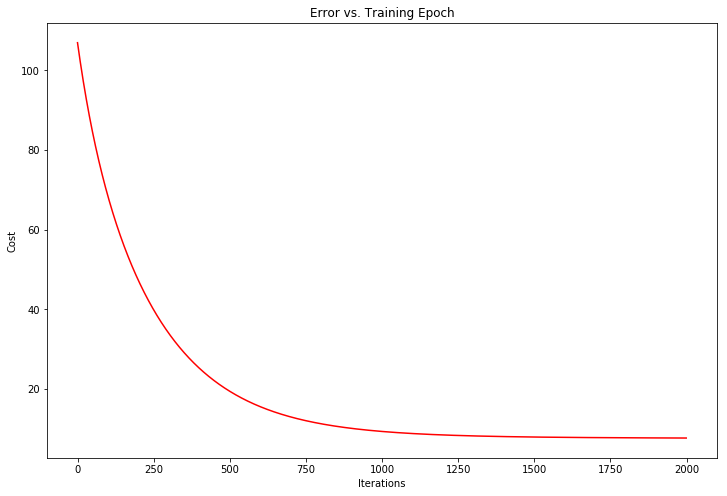

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch), his_cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

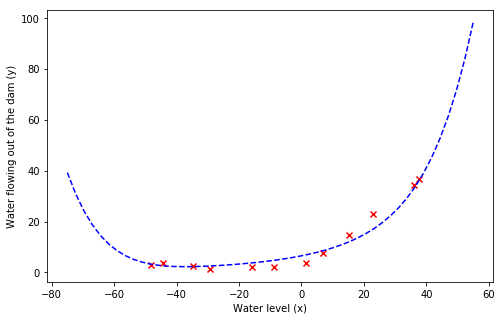

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,1:], y_train, c='r', marker='x')
plt.xlabel('Water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(xx, np.dot(xp_norm, f_theta), 'b--')

Later, the learn curves can be approximated as the sample grows by varying the l value

# Selecting l using a cross validation set

In [32]:
lr = 0.002
epoch = 2000
l = 1
theta = np.ones(Xp_train_norm.shape[1]).reshape(-1, 1)

epoch:  1 cost: 106.70214038406304
epoch:  201 cost: 45.25881617063312
epoch:  401 cost: 21.876977554922394
epoch:  601 cost: 11.343518086544606
epoch:  801 cost: 6.524277338116842
epoch:  1001 cost: 4.303117727119328
epoch:  1201 cost: 3.2657232086538124
epoch:  1401 cost: 2.768342917948738
epoch:  1601 cost: 2.5178105906345274
epoch:  1801 cost: 2.380554477598658
epoch:  1 cost: 106.70239717887058
epoch:  201 cost: 45.26085133540879
epoch:  401 cost: 21.880452623936286
epoch:  601 cost: 11.347961068936604
epoch:  801 cost: 6.529313721426073
epoch:  1001 cost: 4.308498416795547
epoch:  1201 cost: 3.271298345049852
epoch:  1401 cost: 2.7740278325357624
epoch:  1601 cost: 2.523559673173818
epoch:  1801 cost: 2.386344269489768
epoch:  1 cost: 106.70291076798273
epoch:  201 cost: 45.264921328514895
epoch:  401 cost: 21.887401838475174
epoch:  601 cost: 11.356845517090045
epoch:  801 cost: 6.539384490244243
epoch:  1001 cost: 4.319257453572946
epoch:  1201 cost: 3.282446046413543
epoch:  1

Text(0, 0.5, 'Error')

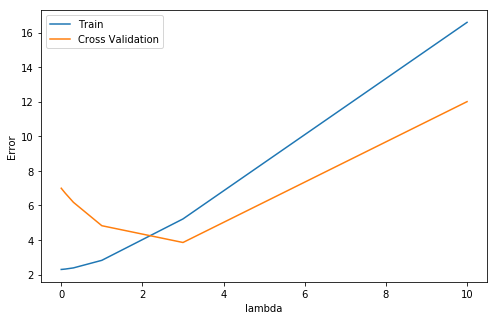

In [35]:
lambdas = [0., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1., 3., 10.]
errors_train, errors_val = [], []
for l in lambdas:
    f_theta, his_cost = GD(Xp_train_norm, y_train, theta, l, lr, epoch)
    errors_train.append(reg_cost(Xp_train_norm, y_train, f_theta, l=0))  
    errors_val.append(reg_cost(Xp_val_norm, y_val, f_theta, l=0))
    
plt.figure(figsize=(8,5))
plt.plot(lambdas,errors_train,label='Train')
plt.plot(lambdas,errors_val,label='Cross Validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Error')

In [36]:
lambdas[np.argmin(errors_val)]

3.0

# Computing test set error

In [37]:
lr = 0.002
epoch = 2000
l = 3
theta = np.ones(Xp_train_norm.shape[1]).reshape(-1, 1)

In [38]:
f_theta, his_cost = GD(Xp_train_norm, y_train, theta, l, lr, epoch)

epoch:  1 cost: 107.47177083107663
epoch:  201 cost: 50.890223596378696
epoch:  401 cost: 31.055264417214516
epoch:  601 cost: 22.692924891302983
epoch:  801 cost: 19.094312382378682
epoch:  1001 cost: 17.527313507543163
epoch:  1201 cost: 16.834702713579823
epoch:  1401 cost: 16.521927430072992
epoch:  1601 cost: 16.376080523724692
epoch:  1801 cost: 16.30477941495016


In [39]:
reg_cost(Xp_test_norm, y_test, f_theta, l=0) # with power = 6

4.811780016340761